## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single Lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [75]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of Lego sets!</p>

In [77]:
# Import pandas
# -- YOUR CODE FOR TASK 3 --
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [79]:
# How many distinct colors are available?
# -- YOUR CODE FOR TASK 3 --
num_colors = colors.shape[0]
# Print num_colors
print(num_colors)

135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [81]:
# colors_summary: Distribution of colors based on transparency
# -- YOUR CODE FOR TASK 4 --
colors_summary = colors.groupby("is_trans").count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


year
1950     10.142857
1953     16.500000
1954     12.357143
1955     36.857143
1956     18.500000
           ...    
2013    181.359191
2014    169.320280
2015    200.223881
2016    248.945813
2017    300.121277
Name: num_parts, Length: 66, dtype: float64


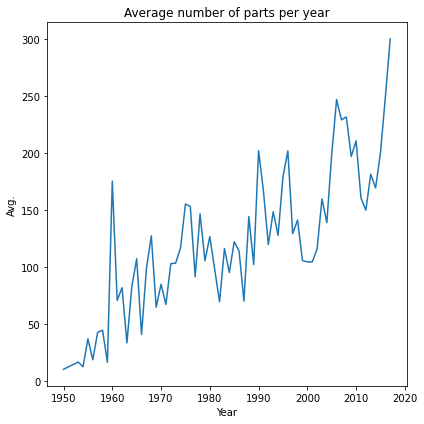

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year').mean()['num_parts']
print(parts_by_year)
# Plot trends in average number of parts by year
plt.figure(figsize=(6,6))
parts_by_year.plot()
plt.title("Average number of parts per year")
plt.xlabel("Year")
plt.ylabel("Avg.")
plt.show()

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [85]:
# themes_by_year: Number of themes shipped by year
# -- YOUR CODE HERE --
themes_by_year = pd.DataFrame(sets.groupby('year')['theme_id'].nunique())
print(themes_by_year)

      theme_id
year          
1950         2
1953         1
1954         2
1955         4
1956         3
...        ...
2013        93
2014        92
2015        99
2016        88
2017        78

[66 rows x 1 columns]


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. Before we wrap up, let's take a closer look at the <code>themes_by_year</code> DataFrame you created in the previous step.</p>

In [87]:
# Get the number of unique themes released in 1999
num_themes = themes_by_year.loc[1999]

# Print the number of unique themes released in 1999
print(num_themes)

theme_id    71
Name: 1999, dtype: int64
